Ported from tybalt/preprocess_data.ipynb script November 27, 2018

# Processing all datasets to be used in downstream analyses

RNAseq data was uploaded to DL102 from a variety of projects downloaded from IDseq. Clinical data was curated from various metadata on taken from appropriate projects.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.patches as mpatches

%matplotlib inline

## Define Input and Output Filenames

In [2]:
# Input Files
rna_file = os.path.join('Data2', 'concatonated_genecounts.csv') 
clinical_file = os.path.join('Data2', 'master_metadata.tsv')
microbe_file = os.path.join('Data2', 'concatonated_microbecounts.csv')

In [3]:
# Output Files
# Processing RNAseq data by z-score and zeroone norm
rna_out_file = os.path.join('Data2', 'idseq_rnaseq.tsv.gz')
rna_out_zeroone_file = os.path.join('Data2', 'idseq_scaled_zeroone_rnaseq.tsv.gz')

# Clinical data
clinical_processed_out_file = os.path.join('Data2', 'idseq_clinical_data.tsv')

## Load Data

In [4]:
rnaseq_df = pd.read_table(rna_file, sep=',', index_col=0)
new_cols = ['_'.join(i.upper().split('_')[0:-1]) for i in list(rnaseq_df.columns)]
rnaseq_df.columns = new_cols
rnaseq_df.head()

,OPS015_UGD-HIV-PNEU_BAL_RNA_1186_A4_S31,OPS015_UGD-HIV-PNEU_BAL_RNA_2195_F21_S160,OPS015_UGD-HIV-PNEU_BAL_RNA_1254_E6_S56,OPS015_UGD-HIV-PNEU_BAL_RNA_2192_B21_S136,OPS015_UGD-HIV-PNEU_BAL_RNA_1858_L3_S187,OPS015_UGD-HIV-PNEU_BAL_RNA_2321_J2_S17,OPS015_UGD-HIV-PNEU_BAL_RNA_1289_I6_S80,OPS015_UGD-HIV-PNEU_BAL_RNA_1864_N3_S199,OPS015_UGD-HIV-PNEU_BAL_RNA_1592_E16_S61,OPS015_UGD-HIV-PNEU_BAL_RNA_1829_P1_S210,...,CHRF_RNA_0031_S31,CHRF_RNA_0004_S4,CHRF_RNA_0042_S42,CHRF_RNA_0043_S43,CHRF_RNA_0020_S20,CHRF0094ISEQ_S1_L001,CHRF_RNA_0086_S86,CHRF_RNA_0070_S70,CHRF_RNA_0061_S61,CHRF_RNA_0058_S58
ENSG00000223972.5,1,2,1,2,6,8,0,0,2,97,...,0,0,0,0,0,1,21,6,0,30
ENSG00000227232.5,0,26,4,6,31,13,0,0,12,112,...,0,10,0,0,0,0,5,14,0,43
ENSG00000278267.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.3,0,0,0,4,2,5,0,0,0,6,...,0,0,0,0,0,0,3,1,0,14
ENSG00000274890.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
microbe_df = pd.read_table(microbe_file, sep=',', index_col = 0)
microbe_df.index = [str(i) for i in microbe_df.index]
microbe_df.head()

/data/katrina/anaconda3/envs/tybalt/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OPS_005_VAP_RNA_9664_P1042495_S43,VAP3_RNA_TA_0328_P1029727_S27,VAP_4_RNA_TA_006078_P1036760_S29,OPS_005_VAP_RNA_11627_P1044409_S72,OPS_001_VAP_RNA_TA_9039_P1040356_S114,VAP8_RNA_TA_006194_P1037879_S146,OPS_012_VAP_OPS_005REPEAT_TA_RNA_9701_P1044541_M8_S76_L001,OPS_005_VAP_RNA_10921_P1042438_S18,OPS_006_VAP_RNA_TA_10138_P1043970_S134,VAP6_RNA_TA_6317_P1038322_S134,...,OPS015_UGD-HIV-PNEU_BAL_RNA_2206_J21_S184,OPS017_UGD-HIV-PNEU-DNA-MEERA_UG3065B_B4_S109,OPS017_UGD-HIV-PNEU-DNA-MEERA_UG4111B_F12_S156,OPS017_UGD-HIV-PNEU-DNA-MEERA_UG3161B_H4_S168,OPS015_UGD-HIV-PNEU_BAL_RNA_2423_L6_S23,OPS015_UGD-HIV-PNEU_BAL_RNA_1937_P7_S213,OPS015_UGD-HIV-PNEU_BAL_RNA_1397_C10_S46,OPS015_UGD-HIV-PNEU_BAL_RNA_1655_I18_S86,OPS017_UGD-HIV-PNEU-DNA-MEERA_UG4015B_H9_S173,OPS015_UGD-HIV-PNEU_BAL_RNA_1243_C6_S44
Bacteria,11.664,2815.981,452.713,75.966,1270.493,15.388,3791.041,29.907,355.983,156.982,...,75.501,1.681,46.496,6.649,28.192,2836.207,1646.302,2308.421,327.255,6577.999
171552,3.399,219.371,0.067,NaN,104.107,0.054,40.822,0.549,NaN,7.614,...,0.175,0.047,10.325,0.023,NaN,0.238,0.045,1.169,186.764,NaN
838,3.349,218.430,0.067,NaN,77.112,0.054,40.822,0.549,NaN,7.614,...,0.175,0.047,10.325,0.023,NaN,0.238,0.045,1.002,186.764,NaN
1300,0.391,1422.304,NaN,0.083,179.040,3.025,7.069,1.013,0.279,16.820,...,25.300,0.648,20.740,1.223,19.977,1.428,0.079,3.675,26.783,4.591
1301,0.391,1422.256,NaN,0.083,179.040,3.025,7.069,1.013,0.279,16.820,...,25.300,0.648,20.740,1.223,19.977,1.428,0.079,3.508,26.783,4.217


In [6]:
sample_set = set(rnaseq_df.columns).intersection(microbe_df.columns)
sample_names = [i for i in rnaseq_df.columns if i in list(sample_set)]
rnaseq_df = rnaseq_df[sample_names]
microbe_df = microbe_df[sample_names]
print(rnaseq_df.shape)
print(microbe_df.shape)

(60590, 1339)
(12797, 1339)


In [7]:
rnaseq_df = pd.concat([rnaseq_df, microbe_df])
print(rnaseq_df.shape)

(73387, 1339)


In [8]:
clinical_df = pd.read_table(clinical_file, index_col=0)
new_idx = [i.upper() for i in list(clinical_df.index)]  # ensure all sample IDs are upper-case
clinical_df.index = new_idx
clinical_df.head()

,Project,Tissue,Sex,Infection,Immune Compromise,Organism,Age,sample_name,uploader,upload_date,...,ercc_reads,subsampled_fraction,quality_control,compression_ratio,tissue_type,nucleotide_type,location,host_genome,notes,sample_diagnosis
CHRF_RNA_0000_S97,CHRF,CSF,NaN,Water,NaN,NaN,PED,CHRF_RNA_0000_S97,NaN,3/25/18 17:51,...,130150782.0,1.000000,31.505,6.16,NaN,RNA,NaN,Human,- Notes: DeRisi_water\n- mNGS result summary (...,NaN
CHRF_RNA_0001_S1,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0001_S1,NaN,3/25/18 17:51,...,33395452.0,1.000000,21.781,2.33,NaN,RNA,NaN,Human,"Parvovirus B19, Antigen for Strept. Pneumonia,...",Meningitis
CHRF_RNA_0002_S2,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0002_S2,NaN,3/25/18 17:51,...,14875054.0,0.823954,35.690,1.47,NaN,RNA,NaN,Human,Streptococcus pneumoniae\n- Serotype: 2\n- CT ...,Meningitis
CHRF_RNA_0003_S3,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0003_S3,NaN,3/25/18 17:51,...,17328160.0,1.000000,15.117,1.43,NaN,RNA,NaN,Human,low TTV\n- Serotype: 19A\n- CT value from qPCR...,Meningitis
CHRF_RNA_0004_S4,CHRF,CSF,NaN,1,NaN,Streptococcus pneumoniae,PED,CHRF_RNA_0004_S4,NaN,3/25/18 17:51,...,45038786.0,1.000000,38.742,2.70,NaN,RNA,NaN,Human,- Serotype: NTD\n- CT value from qPCR: 35.51\n...,Meningitis


In [9]:
print("ex: samples with metadata, but no sample in the genecounts matrix - verified all REPEATS, so OK")
print(len(list(set(clinical_df.index) - set(rnaseq_df.columns))))
print('\n'.join(list(set(clinical_df.index) - set(rnaseq_df.columns))[0:20]))
print("\n")
print("ex: samples present in RNA-seq gene counts, but no metadata available - verified mostly DNA or otherwise OK")
print(len(list(set(rnaseq_df.columns) - set(clinical_df.index))))
print('\n'.join(list(set(rnaseq_df.columns) - set(clinical_df.index))[0:20]))

ex: samples with metadata, but no sample in the genecounts matrix - verified all REPEATS, so OK
278
OPS_012_VAP_OPS_005REPEAT_TA_RNA_10700_P1040963_O2_S85_L001
OPS_001_VAP_RNA_TA_9026_P1040178_S111_L004
OPS_012_VAP_OPS_005REPEAT_TA_RNA_2125_P1037929_K8_S64_L001
OPS_001_VAP_RNA_TA_8440_P1038420_S119_L004
OPS_012_VAP_OPS_005REPEAT_TA_RNA_10634_P1040777_E4_S26_L001
OPS_003_VAP_RNA_TA_10655_P1040794_S182_L003
OPS_001_VAP_RNA_TA_8147_P1037252_S130_L003
OPS_003_VAP_RNA_TA_7529_P1037426_S152_L003
VAP_4_RNA_TA_006072_P1036760_S28
OPS_001_VAP_RNA_TA_4345_P1038088_S136_L004
OPS_012_VAP_OPS_005REPEAT_TA_RNA_6009_P1036761_A22_S11_L001
OPS_012_VAP_OPS_005REPEAT_TA_RNA_4727_P1039515_C2_S13_L001
OPS_012_VAP_OPS_005REPEAT_TA_RNA_9625_P1040062_O12_S90_L001
OPS_001_VAP_RNA_TA_9211_P1040934_S115_L003
OPS_001_VAP_RNA_TA_8238_P1037603_S129_L004
OPS_001_VAP_RNA_TA_7192_P1036820_S137_L004
CHRF_0111_S183_L003_RNA
VAP6_RNA_TA_6284_P1038322_S130
OPS_012_VAP_OPS_005REPEAT_TA_RNA_2417_P1042393_G8_S40_L001
OPS_012

In [10]:
# filter metadata and genecounts to include only samples that are present in boths
samples_present_in_metadata_and_genecounts = list(set(clinical_df.index).intersection(rnaseq_df.columns))
clinical_df = clinical_df.loc[[i in samples_present_in_metadata_and_genecounts for i in clinical_df.index]]
rnaseq_df = rnaseq_df[list(clinical_df.index)]  #samples_present_in_metadata_and_genecounts
print(clinical_df.shape)
print(rnaseq_df.shape)

(1201, 26)
(73387, 1201)


CHRF     98
MBAL     92
PTBI     94
UGD     218
VAP     699
dtype: int64


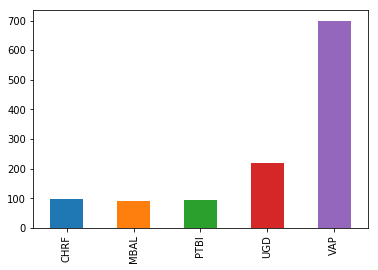

In [11]:
from collections import Counter
print(pd.Series(Counter(clinical_df['Project'])))
pd.Series(Counter(clinical_df['Project'])).plot(kind = 'bar')
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/project_distribution.pdf')

## Begin processing different data types

### RNAseq

Perform basic QC on the RNA-seq data - filtering out samples with very low total counts (likely little input RNA) and genes with low prevalence.

In [12]:
# remove ERCCss
patternDel = "ERCC"
filter = rnaseq_df.index.str.contains(patternDel)
rnaseq_df = rnaseq_df[~filter] 

In [13]:
per_sample_counts = np.log10(rnaseq_df.sum() + 1)

if(sum(per_sample_counts.index != clinical_df.index) > 0):
    print("ERROR: There is something wrong with the order of metadata v. samples - colors will be wrong!")

In [16]:
per_sample_counts.describe()['mean']

count    1201.000000
mean        5.858998
std         0.508019
min         3.454424
25%         5.597438
50%         5.890278
75%         6.210587
max         7.088288
dtype: float64

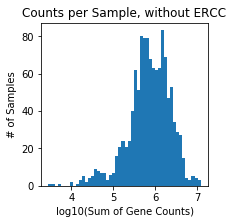

In [14]:
plt.figure(figsize=(3,3))
plt.hist(per_sample_counts, bins=50)  # sum per sample
plt.title("Counts per Sample, without ERCC")
plt.xlabel("log10(Sum of Gene Counts)")
plt.ylabel("# of Samples")
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/vae_genecounts_per_sample_noERCCs.pdf')
plt.show()

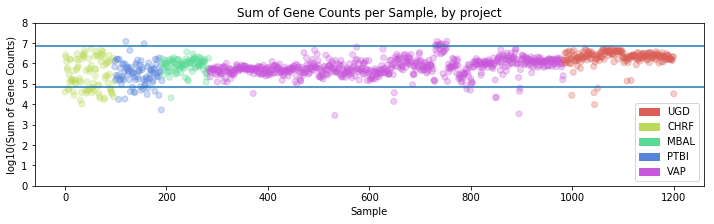

In [15]:
color_dict = dict(zip( list(set(clinical_df['Project'])) ,sns.color_palette("hls", len(set(clinical_df['Project'])))))
patches = [ mpatches.Patch(color=color_dict[i], label=i ) for i in color_dict.keys() ]

plt.figure(figsize = (12, 3))
plt.scatter([i for i in range(len(per_sample_counts))], per_sample_counts,
            color=[color_dict[i] for i in clinical_df['Project']] , alpha = .3)
plt.legend(handles = patches)
plt.ylim(0,8)
plt.title("Sum of Gene Counts per Sample, by project")
plt.ylabel("log10(Sum of Gene Counts)")
plt.xlabel("Sample")
plt.axhline(y=per_sample_counts.describe()['mean'] - 2*per_sample_counts.describe()['std'])
plt.axhline(y=per_sample_counts.describe()['mean'] + 2*per_sample_counts.describe()['std'])
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/genecounts_per_sample_by_project.pdf')
plt.show()

In [16]:
# Remove SAMPLES with < 2 std of the mean total counts
print(rnaseq_df.shape)
threshold = per_sample_counts.describe()['mean'] - 2*per_sample_counts.describe()['std']
samples_to_keep = list(per_sample_counts[per_sample_counts > threshold].index)
rnaseq_df = rnaseq_df[samples_to_keep]
print(rnaseq_df.shape)

(73295, 1201)
(73295, 1143)


In [17]:
clinical_df = clinical_df.loc[rnaseq_df.columns]
print(clinical_df.shape)

(1143, 26)


CHRF     70
MBAL     91
PTBI     81
UGD     213
VAP     688
dtype: int64


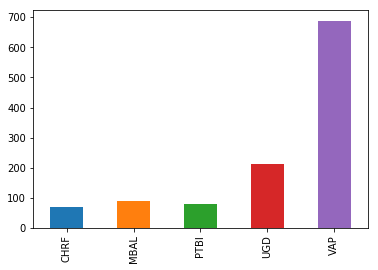

In [18]:
print(pd.Series(Counter(clinical_df['Project'])))
pd.Series(Counter(clinical_df['Project'])).plot(kind='bar')
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/project_distribution_afterfiltering.pdf')

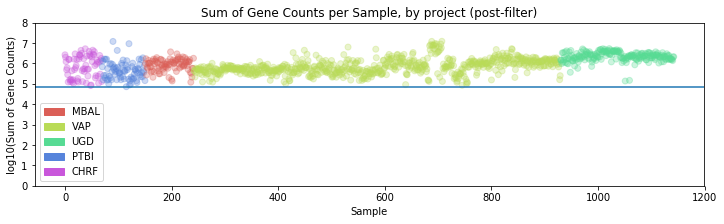

In [19]:
per_sample_counts = np.log10(rnaseq_df.sum() + 1)

plt.figure(figsize = (12, 3))
plt.scatter([i for i in range(len(per_sample_counts))], per_sample_counts,
            color=[color_dict[i] for i in clinical_df['Project']] , alpha = .3)
plt.legend(handles = patches)
plt.ylim(0,8)
plt.title("Sum of Gene Counts per Sample, by project (post-filter)")
plt.ylabel("log10(Sum of Gene Counts)")
plt.xlabel("Sample")
plt.axhline(y=threshold)
plt.show()

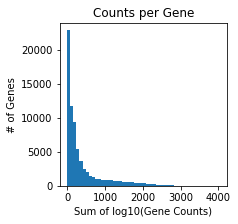

In [20]:
per_gene_counts = np.log10(rnaseq_df + 1).sum(axis=1)
plt.figure(figsize=(3,3))
plt.hist(per_gene_counts, bins=50)  # sum per sample
plt.title("Counts per Gene")
plt.xlabel("Sum of log10(Gene Counts)")
plt.ylabel("# of Genes")
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/counts_per_gene_filtered.pdf')
plt.show()

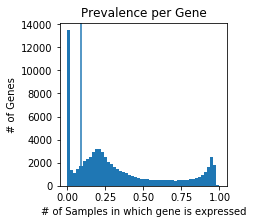

In [21]:
per_gene_prevalence = (rnaseq_df > 0).sum(axis=1)/(rnaseq_df.shape)[1]
prevalence_threshold = per_gene_prevalence.describe()['25%']
plt.figure(figsize=(3,3))
plt.hist(per_gene_prevalence, bins=50)  # sum per sample
plt.title("Prevalence per Gene")
plt.xlabel("# of Samples in which gene is expressed")
plt.ylabel("# of Genes")
plt.axvline(x=prevalence_threshold)
plt.savefig('/data/katrina/AutoEncode/tybalt/PDFS/prevalence_per_gene_filtered.pdf')
plt.show()

In [22]:
per_gene_prevalence.describe()

count    73295.000000
mean         0.329174
std          0.307121
min          0.000000
25%          0.092738
50%          0.228346
75%          0.498688
max          1.000000
dtype: float64

In [23]:
print(rnaseq_df.shape)
genes_to_keep = list(per_gene_prevalence[per_gene_prevalence > prevalence_threshold].index)
rnaseq_df2 = rnaseq_df.loc[genes_to_keep]
print(rnaseq_df2.shape)

(73295, 1143)
(54922, 1143)


In [24]:
# Process RNAseq file
#rnaseq_df.index = rnaseq_df.index.map(lambda x: x.split('|')[0])
#rnaseq_df.columns = rnaseq_df.columns.str.slice(start=0, stop=15)

# Gene is listed twice in RNAseq data, drop both occurrences
#rnaseq_df.drop('SLC35E2', axis=0, inplace=True)
rnaseq_df2 = np.log10(rnaseq_df2.T + 1)

# Determine most variably expressed genes and subset
num_mad_genes = 5000
mad_genes = rnaseq_df2.mad(axis=0).sort_values(ascending=False)
top_mad_genes = mad_genes.iloc[0:num_mad_genes, ].index
rnaseq_subset_df = rnaseq_df2.loc[:, top_mad_genes]

In [25]:
mad_genes.head(20) # verify 1. these are gene names, 2. relative functional relevance via ToppGene

11244                 1.085564
1868215               1.084482
ENSG00000229807.9     1.015299
586                   1.001982
Uncategorized         0.971028
12059                 0.956411
12058                 0.946220
1903414               0.943805
ENSG00000067048.16    0.941545
ENSG00000202198.1     0.909840
ENSG00000236138.4     0.901340
ENSG00000169894.17    0.900117
ENSG00000115414.18    0.884630
ENSG00000280156.1     0.880575
Bacteria              0.876172
ENSG00000281344.1     0.872132
ENSG00000169429.10    0.867955
ENSG00000251562.7     0.865711
ENSG00000173369.15    0.853635
ENSG00000244734.3     0.849216
dtype: float64

(array([  22.,   12.,   48.,  137.,  185.,  168.,  103.,   59.,   76.,
          86.,   61.,   41.,   39.,   51.,   18.,   21.,   10.,    3.,
           1.,    2.]),
 array([ 0.00411772,  0.14010955,  0.27610138,  0.41209321,  0.54808504,
         0.68407687,  0.82006871,  0.95606054,  1.09205237,  1.2280442 ,
         1.36403603,  1.50002786,  1.63601969,  1.77201152,  1.90800335,
         2.04399518,  2.17998701,  2.31597885,  2.45197068,  2.58796251,
         2.72395434]),
 <a list of 20 Patch objects>)

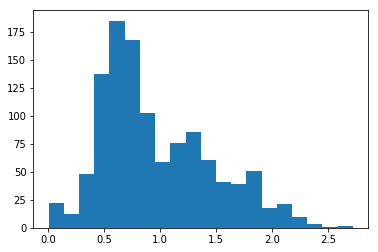

In [33]:
pgp = (rnaseq_subset_df).sum(axis=1)/(rnaseq_subset_df.shape)[1]
plt.hist(pgp, bins=20)

In [26]:
rnaseq_subset_df.fillna(0, inplace=True)

In [27]:
# Scale RNAseq data using z-scores
rnaseq_scaled_df = preprocessing.StandardScaler().fit_transform(rnaseq_subset_df)
rnaseq_scaled_df = pd.DataFrame(rnaseq_scaled_df,
                                columns=rnaseq_subset_df.columns,
                                index=rnaseq_subset_df.index)
rnaseq_scaled_df.to_csv(rna_out_file, sep='\t', compression='gzip')

# Scale RNAseq data using zero-one normalization
rnaseq_scaled_zeroone_df = preprocessing.MinMaxScaler().fit_transform(rnaseq_subset_df)
rnaseq_scaled_zeroone_df = pd.DataFrame(rnaseq_scaled_zeroone_df,
                                        columns=rnaseq_subset_df.columns,
                                        index=rnaseq_subset_df.index)
rnaseq_scaled_zeroone_df.to_csv(rna_out_zeroone_file, sep='\t', compression='gzip')

### Clinical Data

The clinical data consists of hundreds of parameters collected for the TCGA samples. Some columns are redundant, while others contain high amounts of missing data. Select and rename only a couple columns of interest.

In [28]:
set(clinical_df['Project'])

{'CHRF', 'MBAL', 'PTBI', 'UGD', 'VAP'}

In [29]:
# clinical data was modified above to include only samples present in the gene expression data
clinical_df.to_csv(clinical_processed_out_file, sep='\t')

In [30]:
print(len(['VAP' in i for i in list(rnaseq_scaled_df.index)]))
print(sum(['VAP' in i for i in list(rnaseq_scaled_df.index)]))

1143
686
